# Sentiment Analysis

In [1]:
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df = pd.read_csv('Mental-Health-Twitter.csv',index_col=0)

In [3]:
df

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [4]:
len(df['user_id'].unique())

72

In [5]:
df1 = df['user_id'].value_counts()

In [6]:
df1

490044008     2117
1458225506    1593
3249600438    1504
145626605     1276
1616997456     888
              ... 
805234081        2
351777130        1
2565061484       1
2848936114       1
3279878459       1
Name: user_id, Length: 72, dtype: int64

In [7]:
df_invalid = df1.tail(30)

In [8]:
df_valid = df1.head(42)

In [9]:
df_valid

490044008             2117
1458225506            1593
3249600438            1504
145626605             1276
1616997456             888
1497350173             792
2285922931             725
1052121847             717
20118423               698
3346224328             650
3045320288             633
18831261               543
60868031               530
763182466098233344     522
3015971504             458
762433972273950725     396
1169875706             360
49548465               352
14724376               341
377696171              332
1306425758             306
468753088              257
1013187241             243
343501537              221
324294391              215
454311273              196
2780518314             193
221788137              188
1629737760             177
1058067937             161
632291359              144
30863895               142
718984718              138
894149342              131
1143982232             125
171999132              121
47622202               120
3

In [10]:
for i in range(len(df)):
    if df['user_id'][i] in df_invalid:
        df = df.drop(i,axis=0)

In [11]:
df

,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,819336825231773698,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1169875706,442,230,7,1063601,0,0
19996,819334654260080640,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,442,230,7,1063601,0,0
19997,819334503042871297,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1169875706,442,230,7,1063601,0,0
19998,819334419374899200,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1169875706,442,230,7,1063601,0,0


In [12]:
data = df['post_text'].str.lower()

### Text Blob

In [13]:
df["score_TextBlob"] = df["post_text"].map(lambda x:TextBlob(x).sentiment.polarity)

In [14]:
df2 = df[["post_text",'user_id',"score_TextBlob"]]

In [15]:
df2

,post_text,user_id,score_TextBlob
0,It's just over 2 years since I was diagnosed w...,1013187241,0.100000
1,"It's Sunday, I need a break, so I'm planning t...",1013187241,-0.093750
2,Awake but tired. I need to sleep but my brain ...,1013187241,-0.262500
3,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,1.000000
4,It’s hard to say whether packing lists are mak...,1013187241,-0.045833
...,...,...,...
19995,A day without sunshine is like night.,1169875706,0.000000
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,-0.475000
19997,The flow chart is a most thoroughly oversold p...,1169875706,0.500000
19998,"Ships are safe in harbor, but they were never ...",1169875706,0.500000


In [16]:
df2['score_TextBlob'].value_counts()

 0.000000    9185
 0.500000     831
 0.250000     470
 0.200000     369
 0.100000     298
             ... 
-0.029167       1
-0.082143       1
-0.087879       1
-0.202857       1
-0.186364       1
Name: score_TextBlob, Length: 1429, dtype: int64

In [17]:
df2.groupby(['user_id'])['score_TextBlob'].mean()

user_id
14724376              0.073616
18831261              0.075428
20118423              0.049976
20863408              0.085582
29053403              0.024864
30863895              0.071627
39248633              0.097115
47622202              0.137138
49548465              0.091707
60868031              0.060693
145626605             0.011738
171999132             0.203290
221788137             0.155345
324294391             0.044523
325328455             0.077632
343501537             0.083900
377696171             0.046827
454311273             0.073209
468753088             0.075203
490044008             0.060865
632291359             0.026358
718984718             0.056534
803100541             0.161049
894149342             0.167243
1013187241            0.098158
1052121847            0.001626
1058067937           -0.010018
1143982232            0.262116
1169875706            0.089809
1306425758            0.170750
1458225506            0.029314
1497350173            0.069401


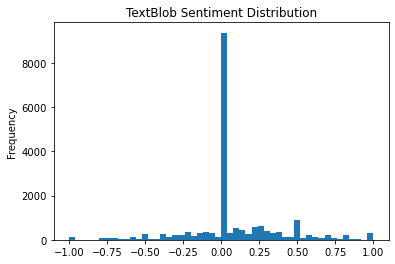

In [18]:
x = df2['score_TextBlob']
plt.hist(x, bins=50)
plt.gca().set(title='TextBlob Sentiment Distribution', ylabel='Frequency');

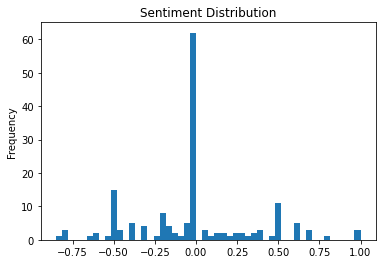

In [19]:
x = df2[df2['user_id'] == 1058067937]['score_TextBlob']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

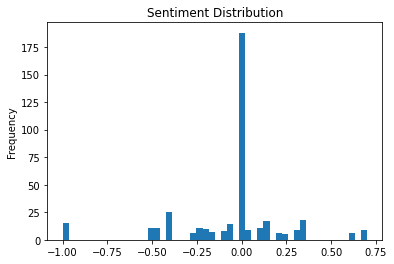

In [20]:
x = df2[df2['user_id'] == 762433972273950725]['score_TextBlob']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

### VADER (Valence Aware Dictionary and Sentiment Reasoner)

In [21]:
analyzer = SentimentIntensityAnalyzer()

#parsing the data(the dataframe from before) into the analyzer
scores = [analyzer.polarity_scores(sentence) for sentence in data]

In [22]:
neg_s = [i["neg"] for i in scores]
neu_s = [i["neu"] for i in scores]
pos_s = [i["pos"] for i in scores]
compound_s = [i["compound"] for i in scores]

In [23]:
df2['negscore_Vader'], df2['neuscore_Vader'], df2['posscore_Vader'], df2['compound_Vader'] = neg_s, neu_s, pos_s, compound_s

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/3224001000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['negscore_Vader'], df2['neuscore_Vader'], df2['posscore_Vader'], df2['compound_Vader'] = neg_s, neu_s, pos_s, compound_s
/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/3224001000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['negscore_Vader'], df2['neuscore_Vader'], df2['posscore_Vader'], df2['compound_Vader'] = neg_s, neu_s, pos_s, compound_s
/var/f

In [24]:
df2

,post_text,user_id,score_TextBlob,negscore_Vader,neuscore_Vader,posscore_Vader,compound_Vader
0,It's just over 2 years since I was diagnosed w...,1013187241,0.100000,0.184,0.816,0.000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",1013187241,-0.093750,0.000,1.000,0.000,0.0000
2,Awake but tired. I need to sleep but my brain ...,1013187241,-0.262500,0.243,0.757,0.000,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,1.000000,0.000,0.629,0.371,0.9150
4,It’s hard to say whether packing lists are mak...,1013187241,-0.045833,0.130,0.753,0.117,0.1779
...,...,...,...,...,...,...,...
19995,A day without sunshine is like night.,1169875706,0.000000,0.487,0.513,0.000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",1169875706,-0.475000,0.257,0.743,0.000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,1169875706,0.500000,0.000,1.000,0.000,0.0000
19998,"Ships are safe in harbor, but they were never ...",1169875706,0.500000,0.000,0.860,0.140,0.2382


In [25]:
df2['compound_Vader'].value_counts()

 0.0000    6362
 0.6369     275
 0.3612     268
-0.5719     265
 0.4404     232
           ... 
 0.9285       1
 0.6381       1
-0.2444       1
 0.9632       1
-0.5773       1
Name: compound_Vader, Length: 2570, dtype: int64

In [26]:
df2.groupby(['user_id'])['compound_Vader'].mean()

user_id
14724376              0.064116
18831261              0.024139
20118423              0.062469
20863408              0.156197
29053403              0.070591
30863895              0.015772
39248633              0.056293
47622202              0.116090
49548465              0.097378
60868031             -0.030595
145626605            -0.080294
171999132             0.346045
221788137             0.293874
324294391             0.012198
325328455            -0.016346
343501537             0.131043
377696171             0.027070
454311273             0.085012
468753088             0.122481
490044008             0.090752
632291359             0.109491
718984718             0.082100
803100541             0.423592
894149342             0.350337
1013187241            0.160144
1052121847           -0.036185
1058067937           -0.120617
1143982232            0.343439
1169875706            0.066310
1306425758            0.311658
1458225506            0.110913
1497350173            0.052252


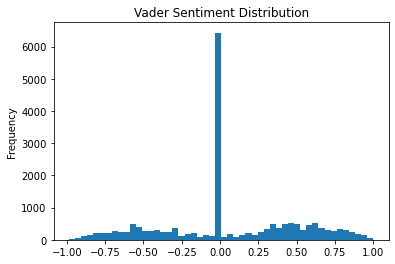

In [27]:
x = df2['compound_Vader']
plt.hist(x, bins=50)
plt.gca().set(title='Vader Sentiment Distribution', ylabel='Frequency');

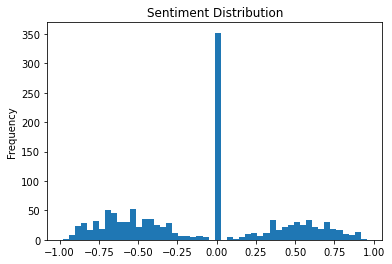

In [28]:
x = df2[df2['user_id'] == 145626605]['compound_Vader']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

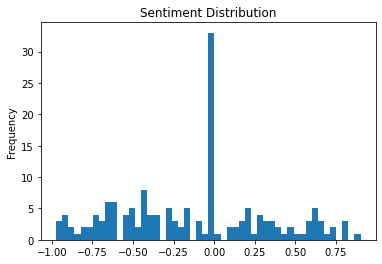

In [29]:
x = df2[df2['user_id'] == 1058067937]['compound_Vader']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

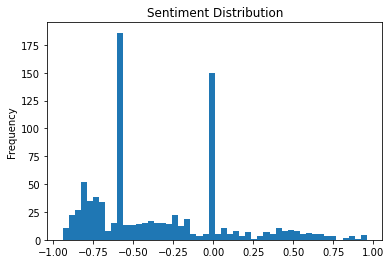

In [30]:
x = df2[df2['user_id'] == 1616997456]['compound_Vader']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

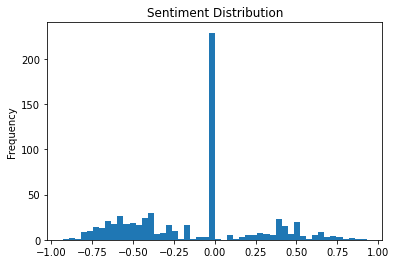

In [31]:
x = df2[df2['user_id'] == 3346224328]['compound_Vader']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

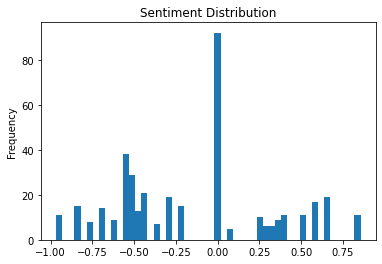

In [32]:
x = df2[df2['user_id'] == 762433972273950725]['compound_Vader']
plt.hist(x,bins=50)
plt.gca().set(title='Sentiment Distribution', ylabel='Frequency');

##  Personal emotion monitoring


In [33]:
df3 = df[["post_text",'post_created','user_id',"score_TextBlob"]]

In [34]:
df3['compound_Vader'] = compound_s

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/2563018620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['compound_Vader'] = compound_s


In [35]:
def time_compact(post):
    post = post[4:10]
    return post

In [36]:
df3['post_created'] = df3['post_created'].apply(time_compact)

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/40880573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['post_created'] = df3['post_created'].apply(time_compact)


In [37]:
df3

,post_text,post_created,user_id,score_TextBlob,compound_Vader
0,It's just over 2 years since I was diagnosed w...,Aug 30,1013187241,0.100000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",Aug 30,1013187241,-0.093750,0.0000
2,Awake but tired. I need to sleep but my brain ...,Aug 29,1013187241,-0.262500,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,Aug 29,1013187241,1.000000,0.9150
4,It’s hard to say whether packing lists are mak...,Aug 29,1013187241,-0.045833,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,Jan 12,1169875706,0.000000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Jan 12,1169875706,-0.475000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,Jan 12,1169875706,0.500000,0.0000
19998,"Ships are safe in harbor, but they were never ...",Jan 12,1169875706,0.500000,0.2382


In [38]:
# Convert string date format to datetime format
df3['post_created'] = pd.to_datetime(df3['post_created'], format='%b %d',errors='coerce')

# # Convert datetime format to desired string format
df3['post_created'] = df3['post_created'].dt.strftime('%m - %d')

# Print the result
df3

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/1461616540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['post_created'] = pd.to_datetime(df3['post_created'], format='%b %d',errors='coerce')
/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/1461616540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['post_created'] = df3['post_created'].dt.strftime('%m - %d')


,post_text,post_created,user_id,score_TextBlob,compound_Vader
0,It's just over 2 years since I was diagnosed w...,08 - 30,1013187241,0.100000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",08 - 30,1013187241,-0.093750,0.0000
2,Awake but tired. I need to sleep but my brain ...,08 - 29,1013187241,-0.262500,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,08 - 29,1013187241,1.000000,0.9150
4,It’s hard to say whether packing lists are mak...,08 - 29,1013187241,-0.045833,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,01 - 12,1169875706,0.000000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",01 - 12,1169875706,-0.475000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,01 - 12,1169875706,0.500000,0.0000
19998,"Ships are safe in harbor, but they were never ...",01 - 12,1169875706,0.500000,0.2382


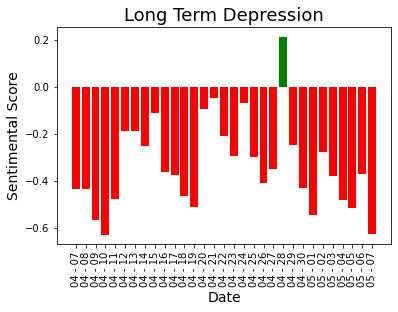

In [39]:
#Long-term depression

person = df3[df3['user_id'] == 1616997456]
image = person.groupby('post_created')["compound_Vader"].mean()
image = pd.DataFrame(image)

x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)


ax.set_title("Long Term Depression", fontsize=18)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

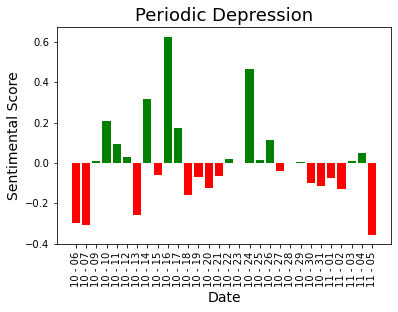

In [40]:
#Long-term healthy

person = df3[df3['user_id'] == 1052121847]
image = person.groupby('post_created')["compound_Vader"].mean()
image = pd.DataFrame(image)

x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)

ax.set_title("Periodic Depression", fontsize=18)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')
# 显示图表
plt.show()

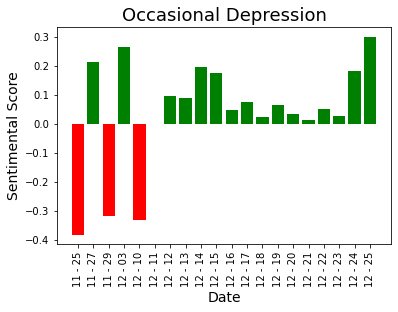

In [41]:
# Periodic positivity and depression

person = df3[df3['user_id'] == 20118423]
image = person.groupby('post_created')["compound_Vader"].mean()
image = pd.DataFrame(image)

x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)

ax.set_title("Occasional Depression", fontsize=18)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

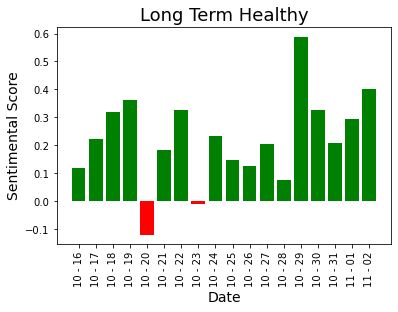

In [42]:
# Periodic positivity and depression

person = df3[df3['user_id'] == 3045320288]
image = person.groupby('post_created')["compound_Vader"].mean()
image = pd.DataFrame(image)

x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)

ax.set_title("Long Term Healthy", fontsize=18)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

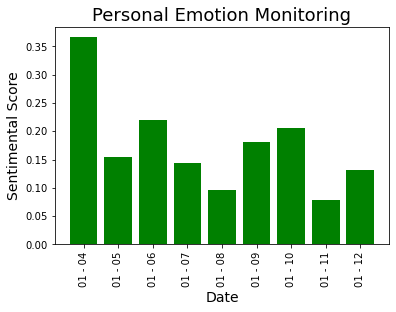

In [43]:
# Periodic positivity and depression

person = df3[df3['user_id'] == 763182466098233344]
image = person.groupby('post_created')["compound_Vader"].mean()
image = pd.DataFrame(image)

x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)

ax.set_title("Personal Emotion Monitoring", fontsize=18)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

# Monthly emotion

In [44]:
monthly = df3

monthly

,post_text,post_created,user_id,score_TextBlob,compound_Vader
0,It's just over 2 years since I was diagnosed w...,08 - 30,1013187241,0.100000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",08 - 30,1013187241,-0.093750,0.0000
2,Awake but tired. I need to sleep but my brain ...,08 - 29,1013187241,-0.262500,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,08 - 29,1013187241,1.000000,0.9150
4,It’s hard to say whether packing lists are mak...,08 - 29,1013187241,-0.045833,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,01 - 12,1169875706,0.000000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",01 - 12,1169875706,-0.475000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,01 - 12,1169875706,0.500000,0.0000
19998,"Ships are safe in harbor, but they were never ...",01 - 12,1169875706,0.500000,0.2382


In [45]:
df4 = df[["post_text",'post_created','user_id',"score_TextBlob"]]

In [46]:
df4['compound_Vader'] = compound_s

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/1318191885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['compound_Vader'] = compound_s


In [47]:
df4

,post_text,post_created,user_id,score_TextBlob,compound_Vader
0,It's just over 2 years since I was diagnosed w...,Sun Aug 30 07:48:37 +0000 2015,1013187241,0.100000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",Sun Aug 30 07:31:33 +0000 2015,1013187241,-0.093750,0.0000
2,Awake but tired. I need to sleep but my brain ...,Sat Aug 29 22:11:07 +0000 2015,1013187241,-0.262500,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,Sat Aug 29 18:40:49 +0000 2015,1013187241,1.000000,0.9150
4,It’s hard to say whether packing lists are mak...,Sat Aug 29 18:40:26 +0000 2015,1013187241,-0.045833,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,Thu Jan 12 00:14:56 +0000 2017,1169875706,0.000000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",Thu Jan 12 00:06:18 +0000 2017,1169875706,-0.475000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,Thu Jan 12 00:05:42 +0000 2017,1169875706,0.500000,0.0000
19998,"Ships are safe in harbor, but they were never ...",Thu Jan 12 00:05:22 +0000 2017,1169875706,0.500000,0.2382


In [48]:
def time_compact(post):
    post = post[4:10]
    return post

In [49]:
df4['post_created'] = df4['post_created'].apply(time_compact)

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/1405823250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['post_created'] = df4['post_created'].apply(time_compact)


In [50]:
# Convert string date format to datetime format
df4['post_created'] = pd.to_datetime(df4['post_created'], format='%b %d',errors='coerce')

# # Convert datetime format to desired string format
df4['post_created'] = df4['post_created'].dt.strftime('%m')
df4

/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/376841154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['post_created'] = pd.to_datetime(df4['post_created'], format='%b %d',errors='coerce')
/var/folders/xj/cm6p67rd49n_6nchzb0w10h00000gn/T/ipykernel_30069/376841154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['post_created'] = df4['post_created'].dt.strftime('%m')


,post_text,post_created,user_id,score_TextBlob,compound_Vader
0,It's just over 2 years since I was diagnosed w...,08,1013187241,0.100000,-0.6597
1,"It's Sunday, I need a break, so I'm planning t...",08,1013187241,-0.093750,0.0000
2,Awake but tired. I need to sleep but my brain ...,08,1013187241,-0.262500,-0.5927
3,RT @SewHQ: #Retro bears make perfect gifts and...,08,1013187241,1.000000,0.9150
4,It’s hard to say whether packing lists are mak...,08,1013187241,-0.045833,0.1779
...,...,...,...,...,...
19995,A day without sunshine is like night.,01,1169875706,0.000000,-0.5773
19996,"Boren's Laws: (1) When in charge, ponder. (2) ...",01,1169875706,-0.475000,-0.6369
19997,The flow chart is a most thoroughly oversold p...,01,1169875706,0.500000,0.0000
19998,"Ships are safe in harbor, but they were never ...",01,1169875706,0.500000,0.2382


In [51]:
df4['post_created'].value_counts()

12    6137
01    5930
10    1879
03     985
04     883
11     796
08     659
05     574
09     549
07     359
02     293
Name: post_created, dtype: int64

In [52]:

image = pd.DataFrame(df4.groupby('post_created')["compound_Vader"].mean())
image

,compound_Vader
post_created,
01,0.078352
02,0.271799
03,0.143559
04,-0.214211
05,0.017432
07,0.100652
08,0.035706
09,0.095160
10,0.021191


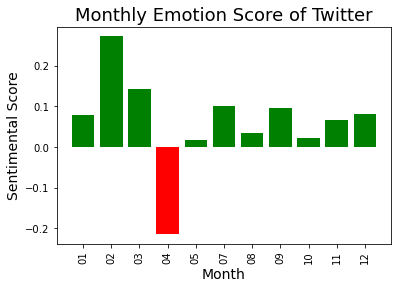

In [53]:
# Monthly Emotion Score of Twitter


x_values = image.index
y_values = image['compound_Vader']
colors = ['green' if x >= 0 else 'red' for x in y_values]

fig, ax = plt.subplots()


ax.bar(x_values, y_values,color=colors)

ax.set_title("Monthly Emotion Score of Twitter", fontsize=18)
ax.set_xlabel("Month", fontsize=14)
ax.set_ylabel("Sentimental Score", fontsize=14)
plt.xticks(rotation='vertical')

plt.show()

## Word Cloud

In [54]:
import nltk
from nltk import FreqDist
import pandas as pd

In [55]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english') #use the NLTK stopwords

In [56]:
# Only choose the 'Content' column
df = pd.read_csv('Mental-Health-Twitter.csv',index_col=0)

In [57]:
df2 = df[df['label']==1]

In [58]:
# transform the content of 'Content' column into a list
list1 = df2['post_text'].tolist()

In [59]:
# transform the content of 'Content' column into a string 
raw = ' '.join(list1)

In [60]:
# clean the data
raw = raw.replace('\n',' ') 
raw = raw.replace(',',' ')
raw = raw.replace('.',' ')

In [61]:
tokens = nltk.word_tokenize(raw)

In [62]:
# customize stop words
stopwords += ['http', 'https', 'rt', 'misslusyd', 'genevieveverso', 'thefuxedos', 'azarkansero']

In [63]:
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

# remove stop words
words_nostopwords = [w for w in words2 if w not in stopwords]

# stemming
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]


In [64]:
# Use a bag-of-words approach with stemming and stop words removal

#Get the frequency distribution 
freq1 = FreqDist(words_nostopwords)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)

In [65]:
# top 30 keywords
sorted_freq1[0:31]

[('depression', 874),
 ('like', 522),
 ('get', 395),
 ('one', 332),
 ('love', 313),
 ('people', 310),
 ('know', 286),
 ('amp', 285),
 ('treatments', 268),
 ('good', 247),
 ('go', 239),
 ('time', 230),
 ('new', 224),
 ('got', 224),
 ('day', 221),
 ('would', 221),
 ('overcome', 219),
 ('life', 206),
 ('today', 205),
 ('need', 200),
 ('make', 200),
 ('much', 197),
 ('help', 191),
 ('think', 188),
 ('want', 187),
 ('really', 184),
 ('see', 161),
 ('health', 161),
 ('feel', 159),
 ('na', 158),
 ('via', 156)]

In [66]:
y_axis = []
x_axis = []

for x in range(0,31):
    y_axis.append(sorted_freq1[x][1])
    x_axis.append(sorted_freq1[x][0])
   

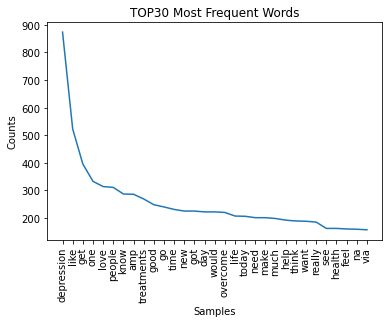

In [67]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)

# add labels and title
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.title('TOP30 Most Frequent Words')
plt.xticks(rotation='vertical')
# show plot
plt.show()

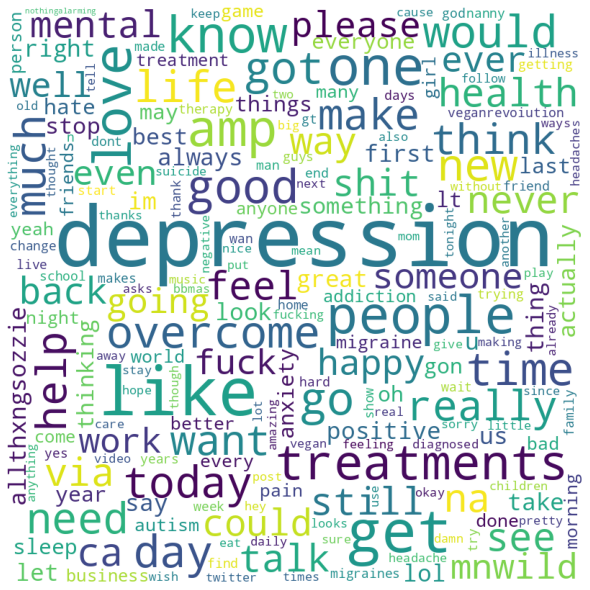

In [68]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary from the sorted frequency distribution list
word_dict = dict(sorted_freq1)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate_from_frequencies(word_dict)

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Show the WordCloud image
plt.show()